<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

<center><h1 style="font-size:2em;color:#2467C0"> Datos del INEGI  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/inegi.png" align="middle" style="width:500"/></td>
<td>
    
El **INEGI** es un organismo público autónomo responsable de normar y coordinar el Sistema Nacional de Información Estadística y Geográfica, así como de captar y difundir información de México en cuanto al territorio, los recursos, la población y economía, que permita dar a conocer las características de nuestro país y ayudar a la toma de decisiones.
    
</td>
</tr>
</table>

# API del Banco de Indicadores

La API de Indicadores del INEGI permite consultar los datos y metadatos de los indicadores disponibles a nivel nacional, por entidad federativa y municipio. Puede utilizar la API para crear aplicaciones que muestren la información directamente de las bases de datos del INEGI en el preciso momento en que se actualiza.
[[1]](https://www.inegi.org.mx/servicios/api_indicadores.html) 

<img src="figuras/Inegi_token.jpg" align="middle" style="width:1000px"/>


#  Historico de Población en México

<div class="alert alert-success">
1. Graficar los datos del parametro "Comparador" de los diferentes estados de México en un mapa
</div>

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json                      

In [62]:
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/e30830c2-d509-5321-f6f8-94859d202c10?type=json'

In [63]:
#Llamado al API
respuesta = requests.get(url)
respuesta.status_code

200

In [64]:
if respuesta.status_code == 200:
    print(respuesta.content)
    content = json.loads(respuesta.content)

content

b'{"Header":{"Name":"Datos compactos BISE","Email":"atencion.usuarios@inegi.org.mx"},"Series":[{"INDICADOR":"1002000001","FREQ":"7","TOPIC":"123","UNIT":"96","UNIT_MULT":"","NOTE":"1398","SOURCE":"2,3,343,487,1714,3001,20101","LASTUPDATE":"24/01/2021","STATUS":"3","OBSERVATIONS":[{"TIME_PERIOD":"1910","OBS_VALUE":"15160369.00000000000000000000","OBS_EXCEPTION":null,"OBS_STATUS":"3","OBS_SOURCE":"","OBS_NOTE":"","COBER_GEO":"0700"},{"TIME_PERIOD":"1921","OBS_VALUE":"14334780.00000000000000000000","OBS_EXCEPTION":null,"OBS_STATUS":"3","OBS_SOURCE":"","OBS_NOTE":"","COBER_GEO":"0700"},{"TIME_PERIOD":"1930","OBS_VALUE":"16552722.00000000000000000000","OBS_EXCEPTION":null,"OBS_STATUS":"3","OBS_SOURCE":"","OBS_NOTE":"","COBER_GEO":"0700"},{"TIME_PERIOD":"1940","OBS_VALUE":"19653552.00000000000000000000","OBS_EXCEPTION":null,"OBS_STATUS":"3","OBS_SOURCE":"","OBS_NOTE":"","COBER_GEO":"0700"},{"TIME_PERIOD":"1950","OBS_VALUE":"25791017.00000000000000000000","OBS_EXCEPTION":null,"OBS_STATUS":"3"

{'Header': {'Name': 'Datos compactos BISE',
  'Email': 'atencion.usuarios@inegi.org.mx'},
 'Series': [{'INDICADOR': '1002000001',
   'FREQ': '7',
   'TOPIC': '123',
   'UNIT': '96',
   'UNIT_MULT': '',
   'NOTE': '1398',
   'SOURCE': '2,3,343,487,1714,3001,20101',
   'LASTUPDATE': '24/01/2021',
   'STATUS': '3',
   'OBSERVATIONS': [{'TIME_PERIOD': '1910',
     'OBS_VALUE': '15160369.00000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1921',
     'OBS_VALUE': '14334780.00000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1930',
     'OBS_VALUE': '16552722.00000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1940',
     'OBS_VALUE': '19653552.00000000

In [65]:
urlHombres = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000002/es/0700/false/BISE/2.0/e30830c2-d509-5321-f6f8-94859d202c10?type=json'
urlMujeres = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000003/es/0700/false/BISE/2.0/e30830c2-d509-5321-f6f8-94859d202c10?type=json'

In [66]:
#Llamado al API
respuestaHombres = requests.get(urlHombres)
respuestaMujeres = requests.get(urlMujeres)
print(respuestaHombres.status_code)
print(respuestaMujeres.status_code)

200
200


In [67]:
poblacion=[]
periodo=[]
if respuesta.status_code == 200:
    #print(respuesta.content)
    content = json.loads(respuesta.content)
    for dic in content['Series'][0]['OBSERVATIONS'] :
       periodo.append( dic['TIME_PERIOD'] )
       poblacion.append(float(dic['OBS_VALUE']) )
        
print(poblacion)
print(periodo)

[15160369.0, 14334780.0, 16552722.0, 19653552.0, 25791017.0, 34923129.0, 48225238.0, 66846833.0, 81249645.0, 91158290.0, 97483412.0, 103263388.0, 112336538.0, 119938473.0, 126014024.0]
['1910', '1921', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '1995', '2000', '2005', '2010', '2015', '2020']


In [68]:
poblacionHombres=[]
periodoHombres=[]
if respuestaHombres.status_code == 200:
    #print(respuesta.content)
    contentHombres = json.loads(respuestaHombres.content)
    for dic in contentHombres['Series'][0]['OBSERVATIONS'] :
       periodoHombres.append( dic['TIME_PERIOD'] )
       poblacionHombres.append(float(dic['OBS_VALUE']) )
        
print(poblacionHombres)
print(periodoHombres)

[7504471.0, 7003785.0, 8119004.0, 9695787.0, 12696935.0, 17415320.0, 24065614.0, 33039307.0, 39893969.0, 44900499.0, 47592253.0, 50249955.0, 54855231.0, 61473390.0]
['1910', '1921', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '1995', '2000', '2005', '2010', '2020']


In [69]:
poblacionMujeres=[]
periodoMujeres=[]
if respuestaMujeres.status_code == 200:
    #print(respuesta.content)
    contentMujeres = json.loads(respuestaMujeres.content)
    for dic in contentMujeres['Series'][0]['OBSERVATIONS'] :
       periodoMujeres.append( dic['TIME_PERIOD'] )
       poblacionMujeres.append(float(dic['OBS_VALUE']) )
        
print(poblacionMujeres)
print(periodoMujeres)

[7655898.0, 7330995.0, 8433718.0, 9957765.0, 13094082.0, 17507809.0, 24159624.0, 33807526.0, 41355676.0, 46257791.0, 49891159.0, 53013433.0, 57481307.0, 64540634.0]
['1910', '1921', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '1995', '2000', '2005', '2010', '2020']


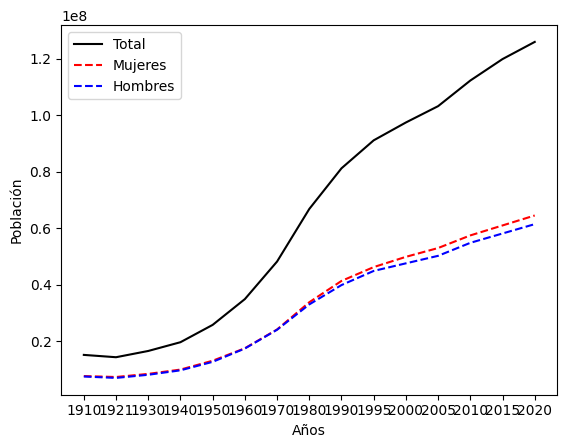

In [70]:
plt.plot(periodo,poblacion,  color='black', linestyle='-',label='Total')
plt.plot(periodoMujeres, poblacionMujeres,  color='red', linestyle='--',label='Mujeres')
plt.plot(periodoMujeres, poblacionHombres,  color='blue', linestyle='--',label='Hombres')

plt.xlabel('Años')
plt.ylabel('Población')
plt.legend()
plt.show()

<div class="alert alert-success">
2. Mostrar en un mapa  el porcentaje de población de 12 años y más económicamente activa por estados. 
Utilizar alguna gama de color que a continuación se presenta.

</div>

<img align="left" style="padding-right:10px;" src="figuras/colores.png">


In [71]:
catalog_States = pd.read_csv('datos/Catalogo_entidades.csv')
catalog_States

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL
5,6,COLIMA,CM
6,7,CHIAPAS,CS
7,8,CHIHUAHUA,CH
8,9,CIUDAD DE MÉXICO,DF
9,10,DURANGO,DG


In [85]:
lista_porcentaje= []

for numero in catalog_States['CLAVE_ENTIDAD']:
    if numero < 10:
        idnum = '0700000'+str(numero)
    else:
        idnum = '070000'+str(numero)
    urlEstados = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019030/es/'+ idnum +'/true/BISE/2.0/e30830c2-d509-5321-f6f8-94859d202c10?type=json'
    responseEstados = requests.get(urlEstados)
    if responseEstados.status_code == 200:
        contenido = json.loads(responseEstados.content)
        lista_porcentaje.append(round(float(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE']),4))

catalog_States['PORCENTAJE'] = lista_porcentaje

catalog_States.head()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import folium
map = folium.Map(location=[24,-102], zoom_start=5,min_zoom=5,max_zoom=6)

In [ ]:
estados_geo = ('datos/mexico_estados_geo.json')
#TItulo
titulo="Porcentaje de 12 años y "

folium.Choropleth(geo_data=estados_geo, data=df_estados, 
             columns=['ABREVIATURA', 'PORCENTAJE'],
             key_on='feature.id',
             fill_color='RdPu', fill_opacity=0.9, line_opacity=0.9,
             legend_name=titulo).add_to(map)
map